In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [3]:
data = pd.read_csv("C:\\Users\\Sarmistha\\Downloads\ETH-BTC-USD.csv")
data['Date'] = pd.to_datetime(data['Date'])
data=data.sort_values(by="Date",ascending=True)
df = data.copy()
data.set_index("Date",inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume,Currency
Date,,,,,,,
2018-11-14,206.533997,207.044998,174.084000,181.397003,181.397003,2.595330e+09,Etherium
2018-11-14,6351.240234,6371.549805,5544.089844,5738.350098,5738.350098,7.398940e+09,Bitcoin
2018-11-15,181.899002,184.251007,170.188995,180.806000,180.806000,2.638410e+09,Etherium
2018-11-15,5736.149902,5774.819824,5358.379883,5648.029785,5648.029785,7.032140e+09,Bitcoin
2018-11-16,180.865005,181.350006,173.126007,175.177002,175.177002,2.015330e+09,Etherium


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3654 entries, 2018-11-14 to 2023-11-14
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3654 non-null   float64
 1   High       3654 non-null   float64
 2   Low        3654 non-null   float64
 3   Close      3654 non-null   float64
 4   Adj Close  3654 non-null   float64
 5   Volume     3654 non-null   float64
 6   Currency   3654 non-null   object 
dtypes: float64(6), object(1)
memory usage: 228.4+ KB


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3.654000e+03
mean,12489.722362,12779.702503,12176.712024,12497.298504,12497.298504,2.132673e+10
std,15981.149824,16367.131613,15548.523408,15982.555689,15982.555689,1.657009e+10
min,84.279694,85.342743,82.829887,84.308296,84.308296,1.496177e+09
25%,1318.626008,1346.194641,1275.408967,1320.796630,1320.796630,9.610954e+09
50%,3880.535767,3964.966553,3783.871582,3881.728149,3881.728149,1.741543e+10
75%,20589.010253,21038.371580,20185.608885,20598.490722,20598.490722,2.857312e+10
max,67549.734380,68789.625000,66382.062500,67566.828130,67566.828130,3.509680e+11


In [6]:
btc = data[data["Currency"]=="Bitcoin"][["Open","High","Low","Close","Adj Close","Volume"]]
btc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-14,6351.240234,6371.549805,5544.089844,5738.350098,5738.350098,7.398940e+09
2018-11-15,5736.149902,5774.819824,5358.379883,5648.029785,5648.029785,7.032140e+09
2018-11-16,5645.319824,5657.020020,5498.939941,5575.549805,5575.549805,5.279320e+09
2018-11-17,5578.580078,5578.580078,5519.560059,5554.330078,5554.330078,4.303150e+09
2018-11-18,5559.740234,5653.609863,5559.740234,5623.540039,5623.540039,4.159680e+09


In [7]:
eth = data[data["Currency"]=="Etherium"][["Open","High","Low","Close","Adj Close","Volume"]]
eth.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-14,206.533997,207.044998,174.084000,181.397003,181.397003,2.595330e+09
2018-11-15,181.899002,184.251007,170.188995,180.806000,180.806000,2.638410e+09
2018-11-16,180.865005,181.350006,173.126007,175.177002,175.177002,2.015330e+09
2018-11-17,175.360001,175.850998,172.869003,174.001007,174.001007,1.832800e+09
2018-11-18,174.175003,179.151993,174.175003,177.067001,177.067001,1.810920e+09


For Bitcoin: Let's start by plotting our data in graphs to have a general understanding of the variation of our data

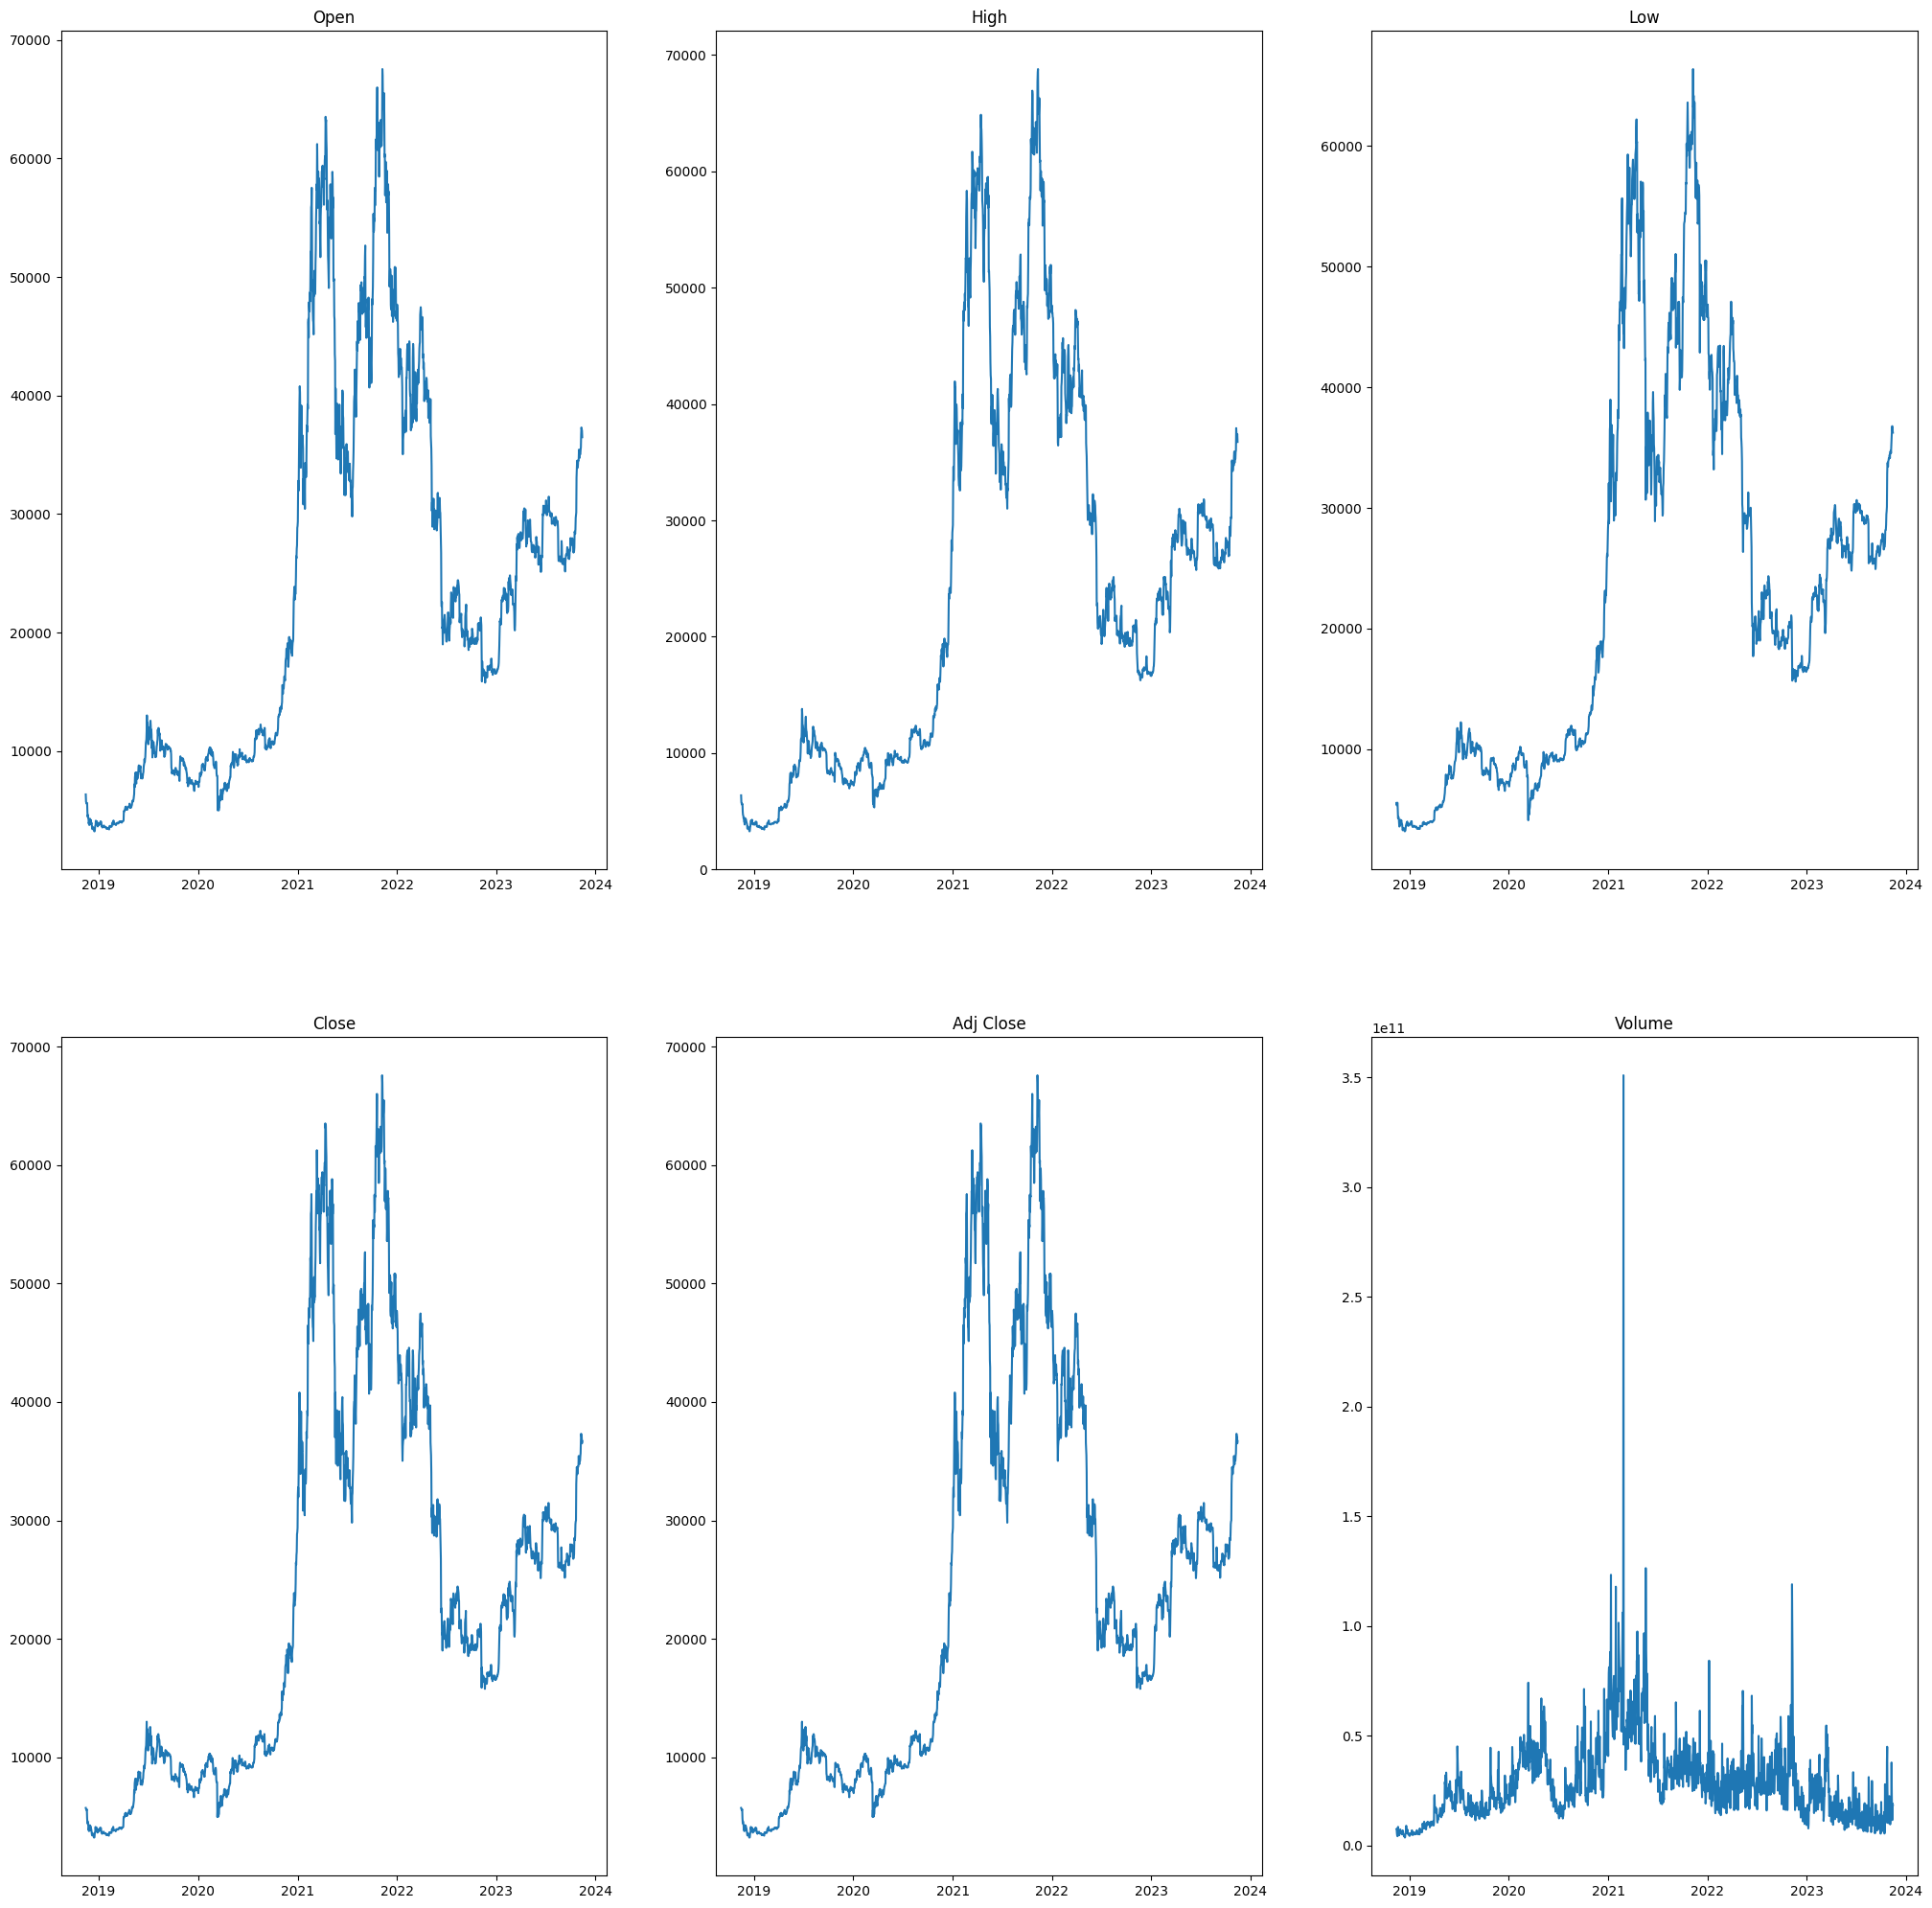

In [10]:

fig = plt.figure(figsize=(25,25))
i=1
for x in btc.columns :
    plt.subplot(2,3,i)
    ax=sns.lineplot(btc[x])
    ax.set(xlabel=None)
    plt.title(str(x), loc='center')
    plt.xlabel(None)
    plt.ylabel(None)
    i+=1
plt.show()

For Etherium:

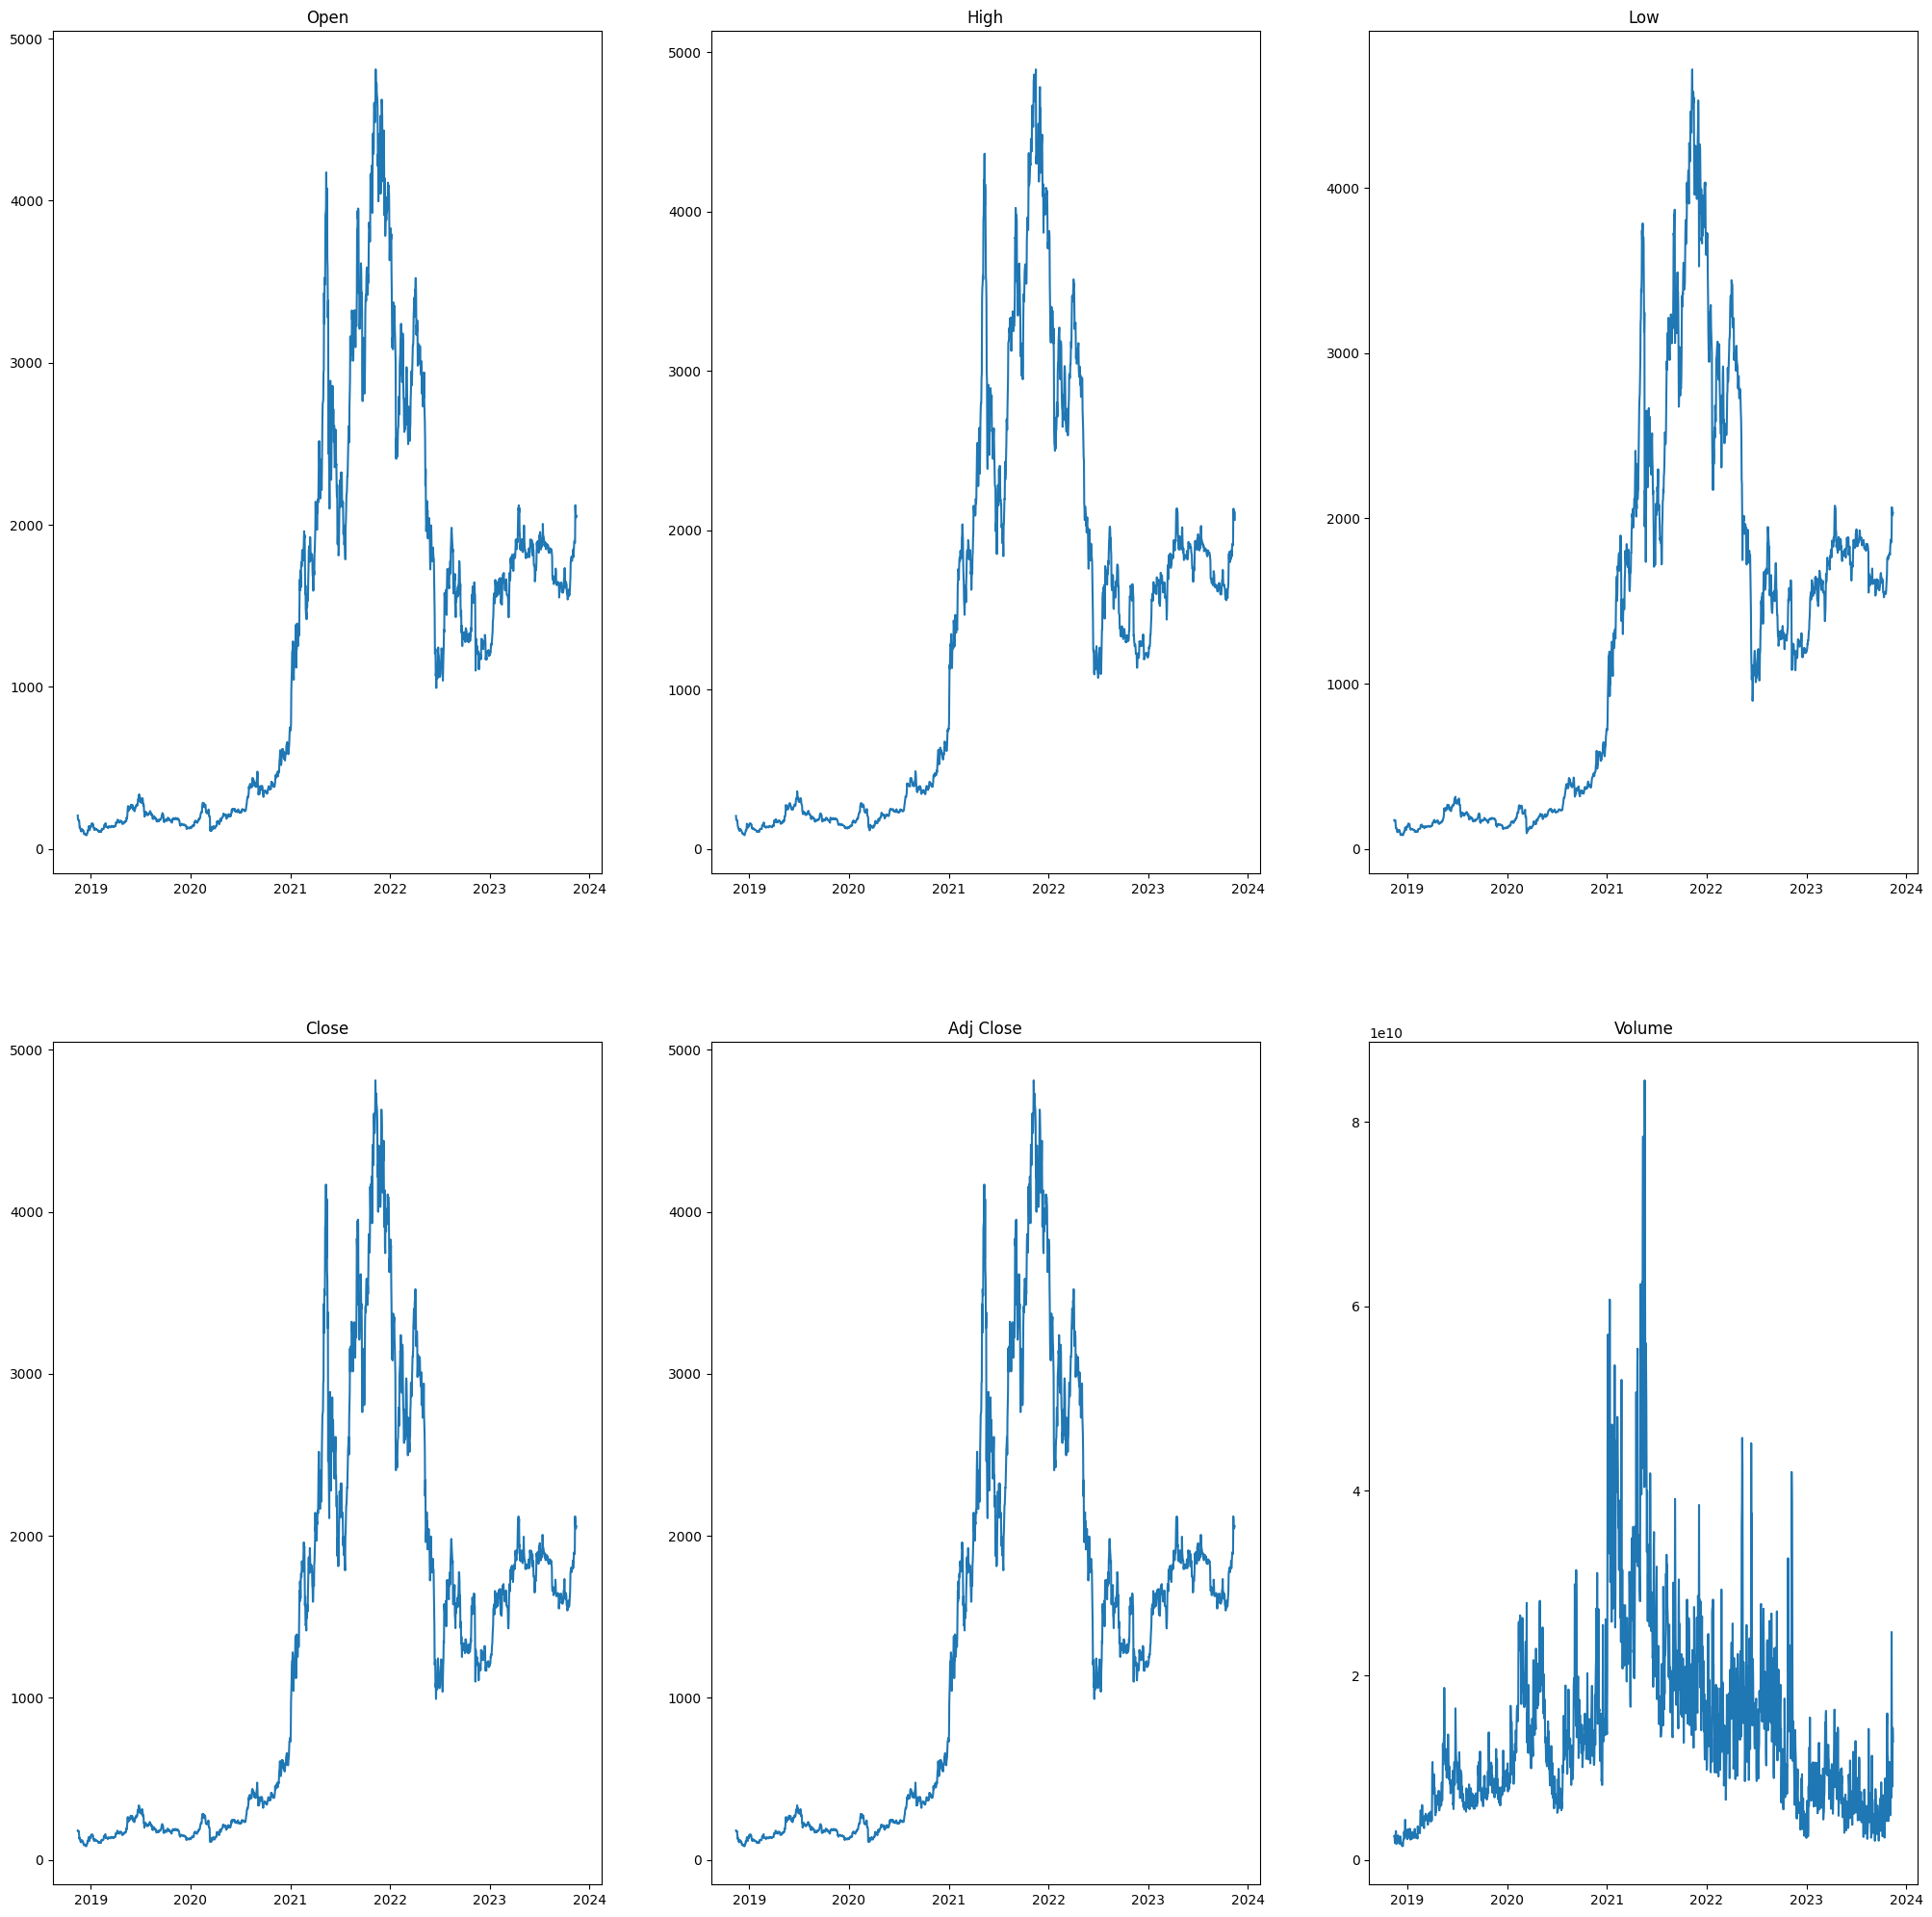

In [11]:
fig = plt.figure(figsize=(25,25))
i=1
for x in eth.columns :
    plt.subplot(2,3,i)
    ax=sns.lineplot(eth[x])
    ax.set(xlabel=None)
    plt.title(str(x), loc='center')
    plt.xlabel(None)
    plt.ylabel(None)
    i+=1
plt.show()

# Growth rate is the percentage change in a value over a specific time period, often expressed as a percentage. The formula for calculating the growth rate is:

Growth Rate = (New Value - Old Value)/(Old Value) * 100%
For Bitcoin:

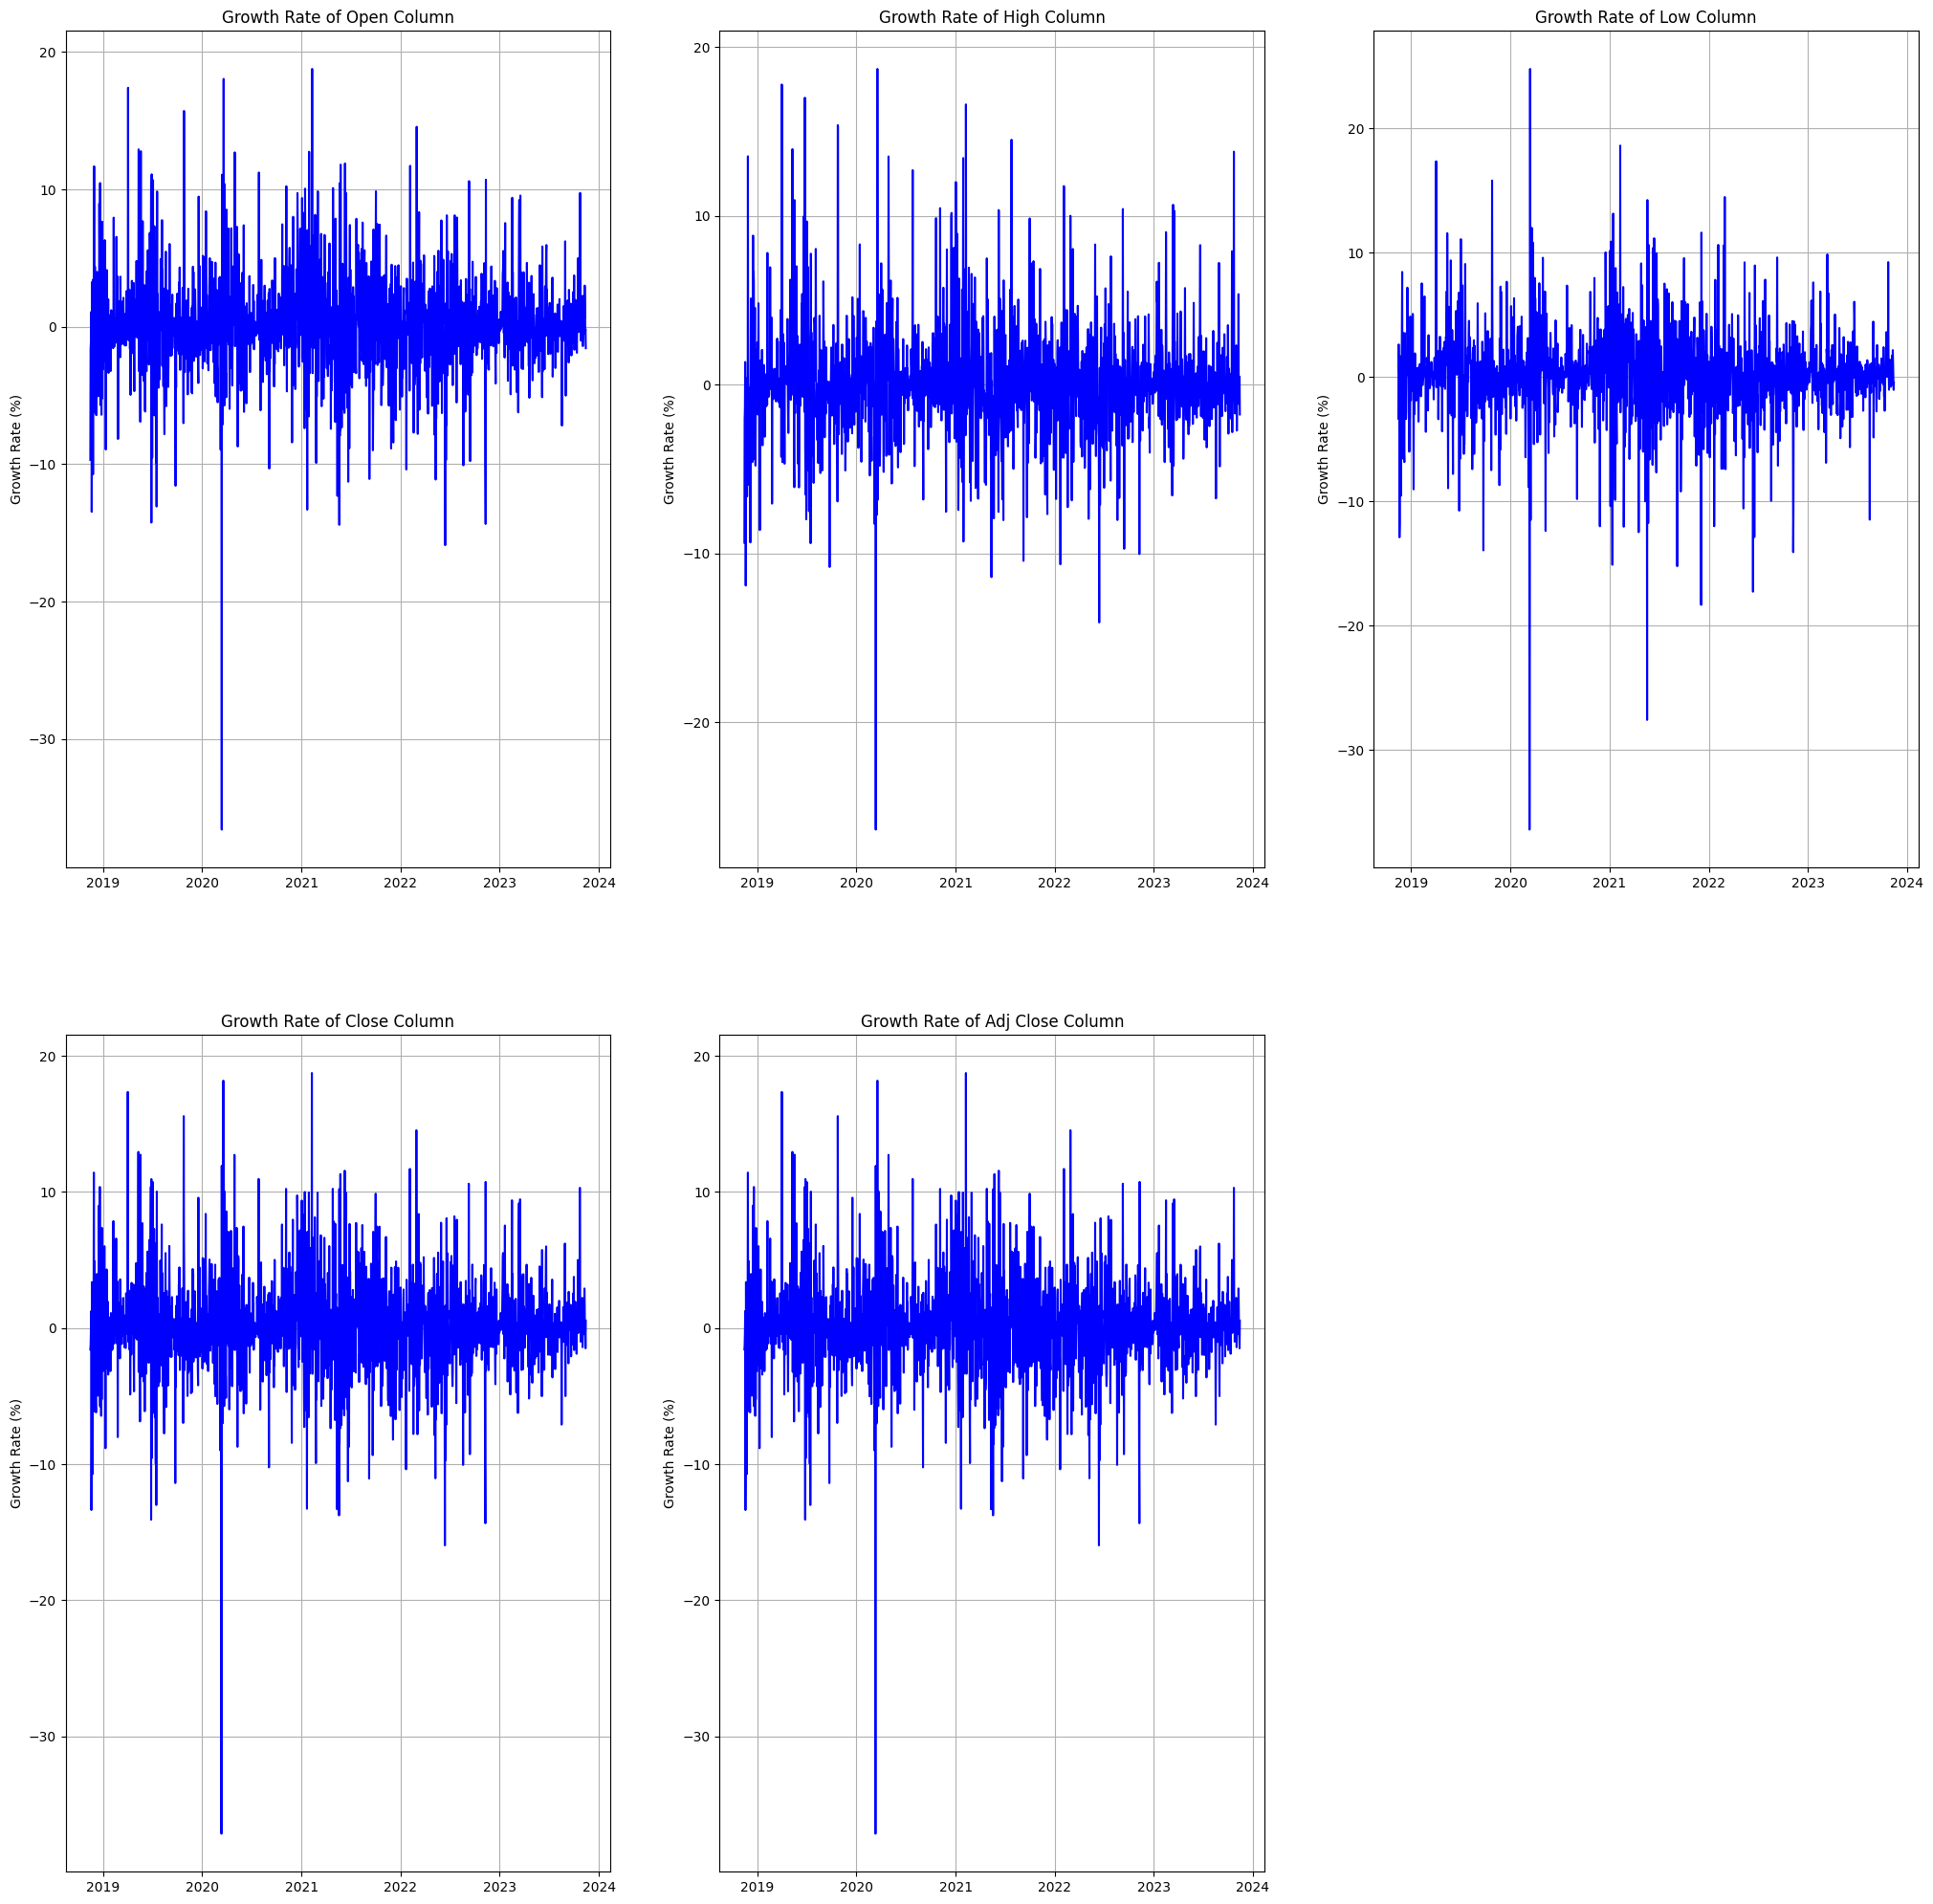

In [12]:
plt.figure(figsize=(25,25))
i=1
for x in btc.columns[:-1]:
    plt.subplot(2,3,i)
    data['Growth Rate'] = (btc[x] - btc[x].shift(1)) / btc[x].shift(1) * 100
    plt.plot(data.index, data['Growth Rate'], linestyle='-', color='b')
    plt.xlabel(None)
    plt.ylabel('Growth Rate (%)')
    plt.title(f'Growth Rate of {x} Column')
    plt.grid(True)
    i+=1
plt.show()

For Etherium # Growth rate

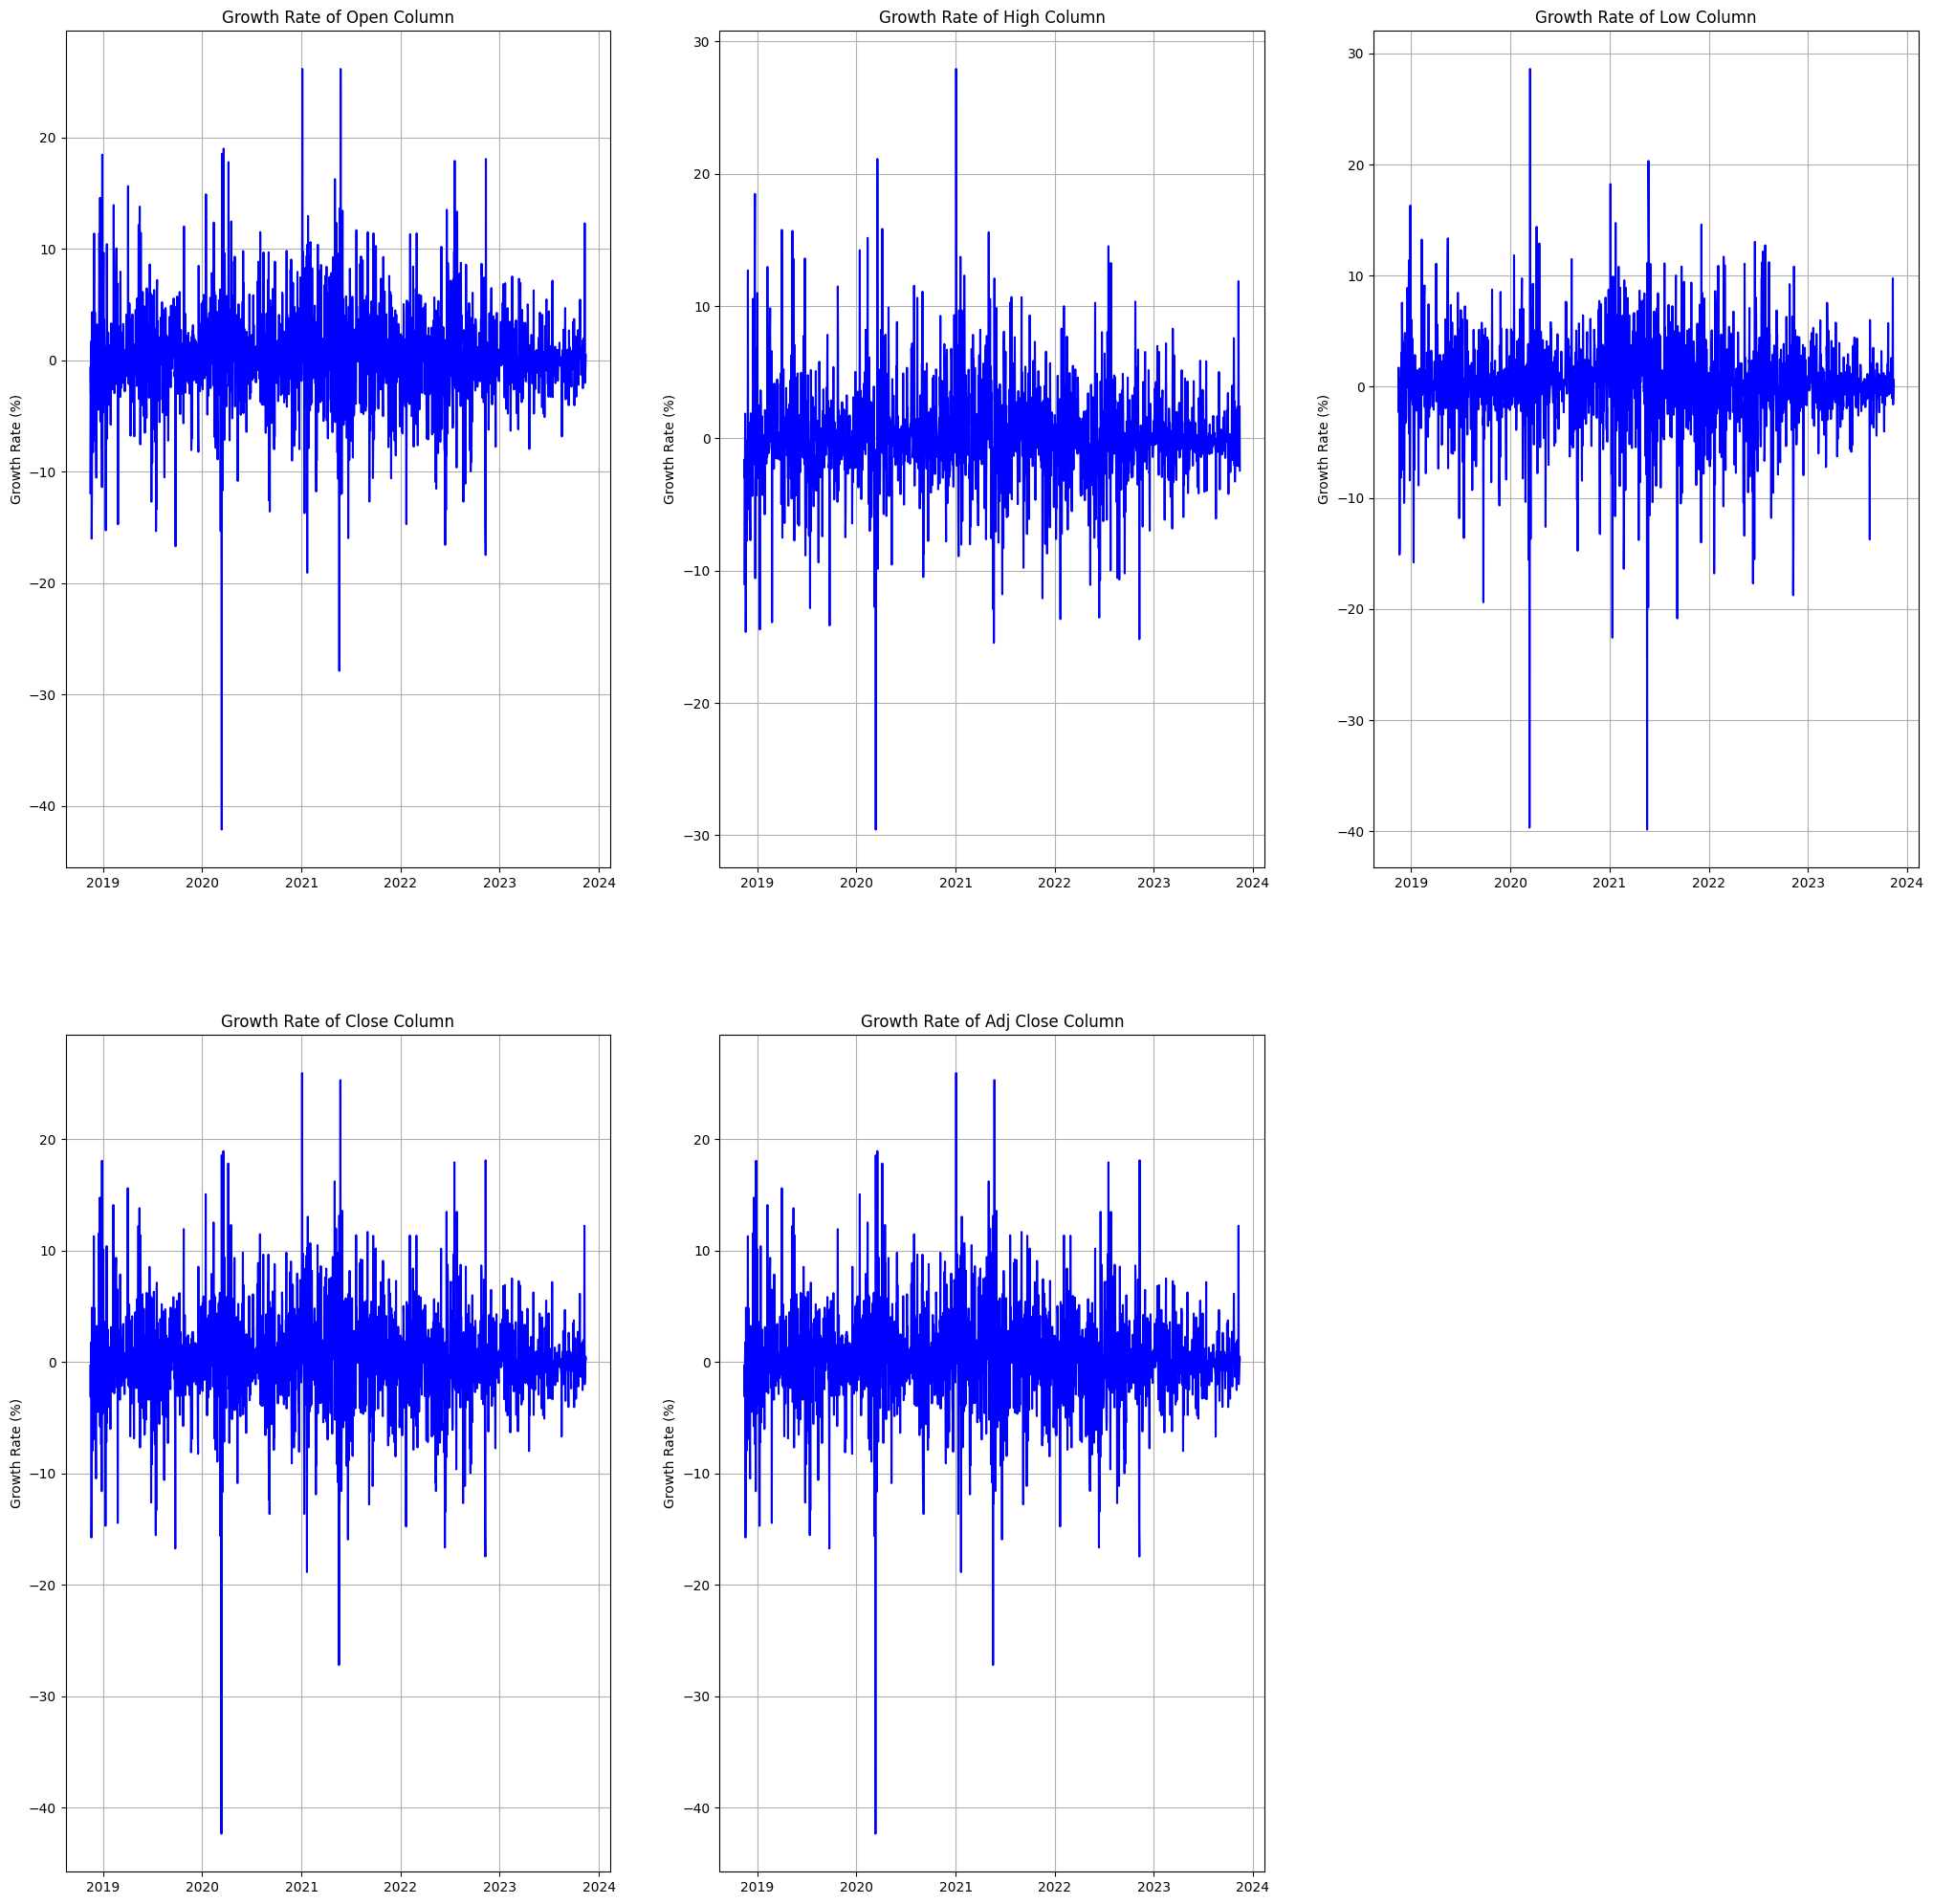

In [13]:
plt.figure(figsize=(25,25))
i=1
for x in eth.columns[:-1]:
    plt.subplot(2,3,i)
    data['Growth Rate'] = (eth[x] - eth[x].shift(1)) / eth[x].shift(1) * 100
    plt.plot(data.index, data['Growth Rate'], linestyle='-', color='b')
    plt.xlabel(None)
    plt.ylabel('Growth Rate (%)')
    plt.title(f'Growth Rate of {x} Column')
    plt.grid(True)
    i+=1
plt.show()

Moving Average
One of the basic analysis technique for time series data is moving average. As the name suggests, rather than calculating
the average on the whole dataset, moving average (also called rolling mean) calculates the average of a subset with a 
certain window size, and shifts forward.
For Bitcoin

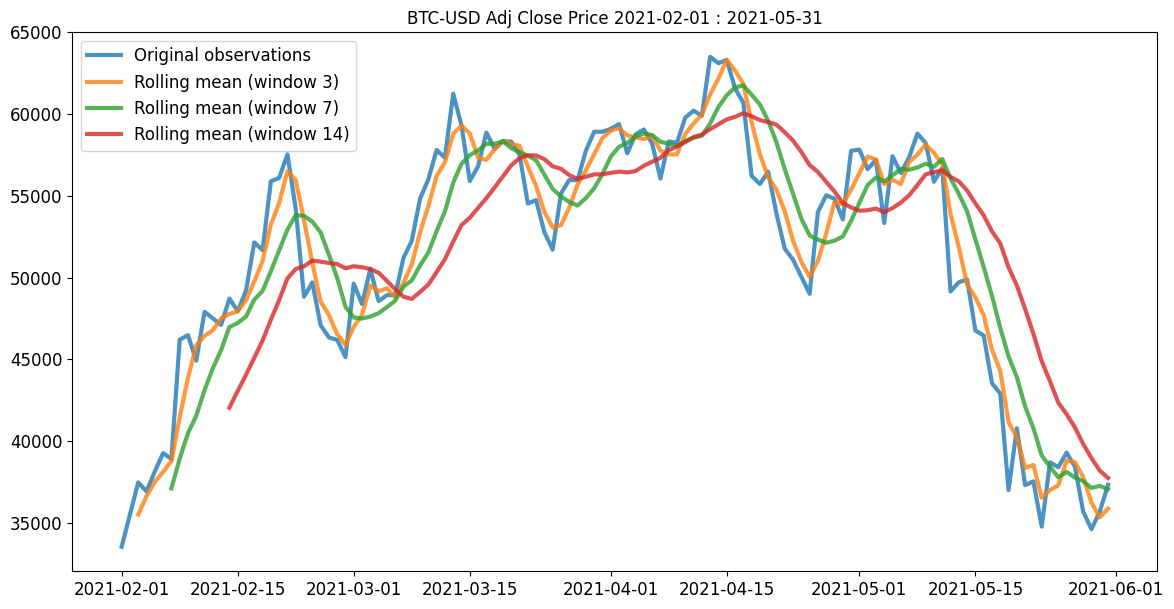

In [14]:
btc_recent = btc["Adj Close"].loc['2021-02-01':'2021-05-31']

rroll_d3 = btc_recent.rolling(window=3).mean()
rroll_d7 = btc_recent.rolling(window=7).mean()
rroll_d14 = btc_recent.rolling(window=14).mean()

plt.figure(figsize=(14, 7))
plt.plot(btc_recent.index, btc_recent, lw=3, alpha=0.8,label='Original observations')
plt.plot(btc_recent.index, rroll_d3, lw=3, alpha=0.8,label='Rolling mean (window 3)')
plt.plot(btc_recent.index, rroll_d7, lw=3, alpha=0.8,label='Rolling mean (window 7)')
plt.plot(btc_recent.index, rroll_d14, lw=3, alpha=0.8,label='Rolling mean (window 14)')

plt.title('BTC-USD Adj Close Price 2021-02-01 : 2021-05-31')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

Etherium

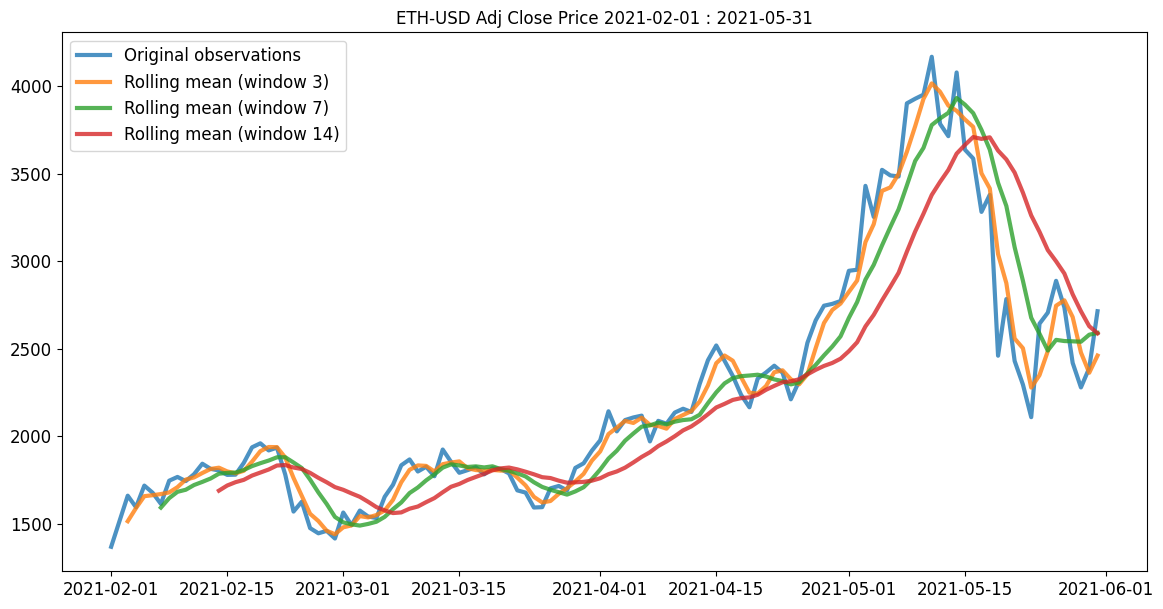

In [15]:
eth_recent = eth["Adj Close"].loc['2021-02-01':'2021-05-31']

rroll_d3 = eth_recent.rolling(window=3).mean()
rroll_d7 = eth_recent.rolling(window=7).mean()
rroll_d14 = eth_recent.rolling(window=14).mean()

plt.figure(figsize=(14, 7))
plt.plot(eth_recent.index, eth_recent, lw=3, alpha=0.8,label='Original observations')
plt.plot(eth_recent.index, rroll_d3, lw=3, alpha=0.8,label='Rolling mean (window 3)')
plt.plot(eth_recent.index, rroll_d7, lw=3, alpha=0.8,label='Rolling mean (window 7)')
plt.plot(eth_recent.index, rroll_d14, lw=3, alpha=0.8,label='Rolling mean (window 14)')

plt.title('ETH-USD Adj Close Price 2021-02-01 : 2021-05-31')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

Seasonal Trends
Analyzing seasonal trends in Bitcoin or any financial time series data involves identifying repeating patterns or 
behaviors that occur at specific times of the year. Seasonal trends can be influenced by various factors, including holidays, 
market cycles, or other external events.


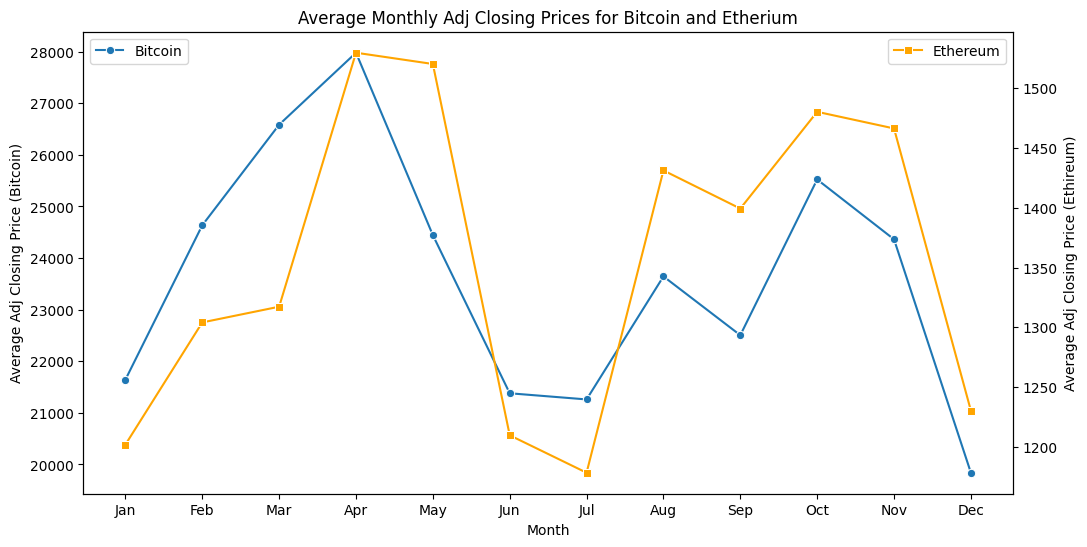

In [16]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

average_monthly_prices = df.groupby(['Month', 'Currency'])['Adj Close'].mean().reset_index()

pivot_table = average_monthly_prices.pivot(index='Month', columns='Currency', values='Adj Close')

plt.figure(figsize=(12, 6))
ax1 = sns.lineplot(data=pivot_table['Bitcoin'], marker='o', label='Bitcoin')

ax2 = ax1.twinx()
sns.lineplot(data=pivot_table['Etherium'], marker='s', color='orange', ax=ax2, label='Ethereum')

ax1.set_title('Average Monthly Adj Closing Prices for Bitcoin and Etherium')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Adj Closing Price (Bitcoin)')
ax2.set_ylabel('Average Adj Closing Price (Ethireum)')

ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [17]:
scaler = MinMaxScaler()
btc['Adj Close'] = scaler.fit_transform(btc[['Adj Close']])
eth['Adj Close'] = scaler.fit_transform(eth[['Adj Close']])

In [18]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        dataX.append(dataset[i:(i + look_back)])
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [19]:
split_idx = int(len(btc) * 0.8)
train_data_btc = btc.iloc[:split_idx]
test_data_btc = btc.iloc[split_idx:]

trainX_btc, trainY_btc = create_dataset(train_data_btc['Adj Close'].values, 30)
testX_btc, testY_btc = create_dataset(test_data_btc['Adj Close'].values, 30)

In [20]:
split_idx = int(len(btc) * 0.8)
train_data_eth = eth.iloc[:split_idx]
test_data_eth = eth.iloc[split_idx:]

trainX_eth, trainY_eth = create_dataset(train_data_eth['Adj Close'].values, 30)
testX_eth, testY_eth = create_dataset(test_data_eth['Adj Close'].values, 30)

In [21]:
trainX_btc = np.reshape(trainX_btc, (trainX_btc.shape[0], trainX_btc.shape[1], 1))
testX_btc = np.reshape(testX_btc, (testX_btc.shape[0], testX_btc.shape[1], 1))

trainX_eth = np.reshape(trainX_eth, (trainX_eth.shape[0], trainX_eth.shape[1], 1))
testX_eth = np.reshape(testX_eth, (testX_eth.shape[0], testX_eth.shape[1], 1))

Bitcoin

In [22]:
model = Sequential()
model.add(LSTM(units=50, input_shape=(30, 1)))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(trainX_btc, trainY_btc, epochs=50, batch_size=32)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0486
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0019
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0015
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0013
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0013
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0012
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0012
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0012
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0010  
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0010
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0010
Epoch 12/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.2814e-04
Epoch 13/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.0574e-04
Epoch 14/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.9423e-04
Epoch 15/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.97

In [23]:
testPredict = model.predict(testX_btc)
testPredict = scaler.inverse_transform(testPredict)
testY_btc = scaler.inverse_transform(testY_btc.reshape(-1, 1))

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


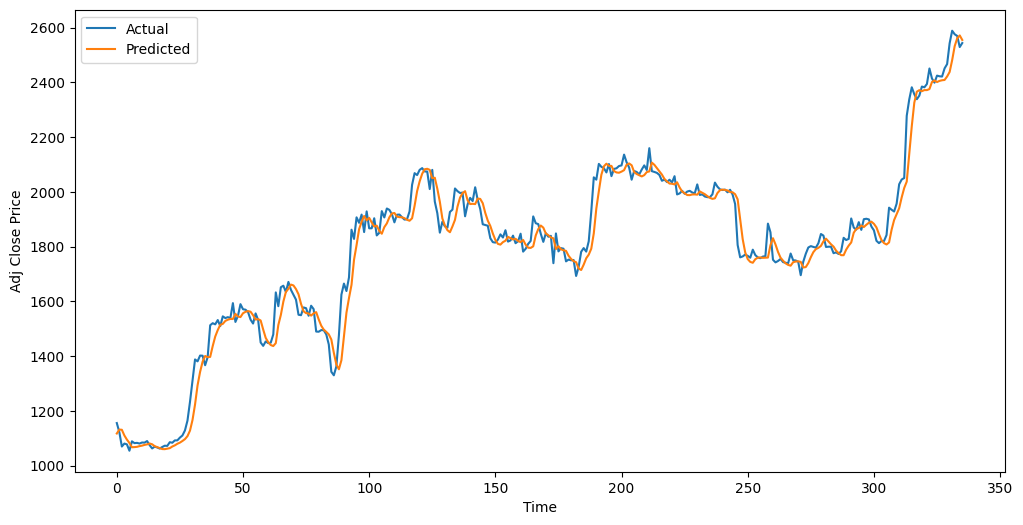

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(testY_btc, label='Actual')
plt.plot(testPredict, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

Etherium

In [25]:
model = Sequential()
model.add(LSTM(units=50, input_shape=(30, 1)))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(trainX_eth, trainY_eth, epochs=50, batch_size=32)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0316 
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0017
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0017
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0014
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0013
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0011
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0010
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011
Epoch 12/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.3978e-04
Epoch 13/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.7906e-04
Epoch 14/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.6188e-04
Epoch 15/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.322

In [26]:
testPredict = model.predict(testX_eth)
testPredict = scaler.inverse_transform(testPredict)
testY_eth = scaler.inverse_transform(testY_eth.reshape(-1, 1))

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


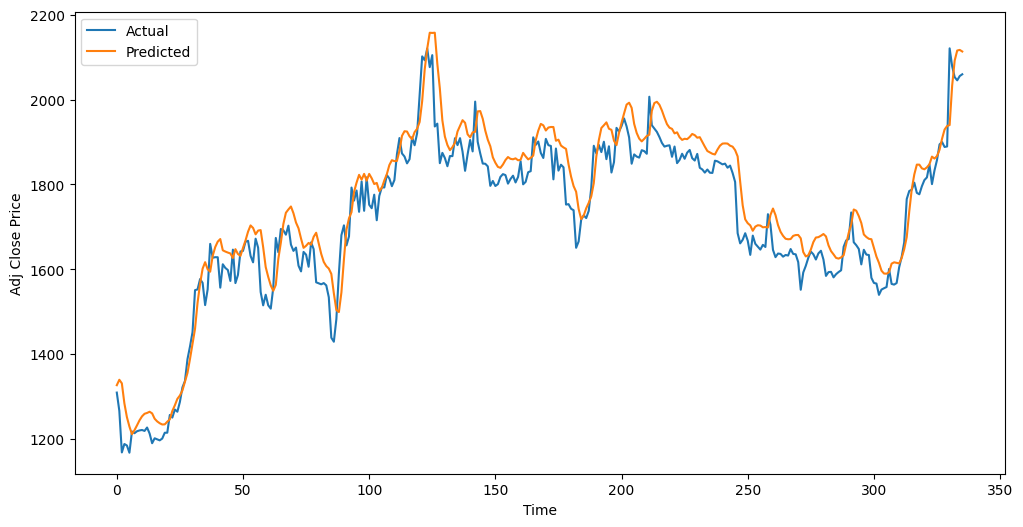

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(testY_eth, label='Actual')
plt.plot(testPredict, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()